<a href="https://colab.research.google.com/github/raviteja-padala/EDA/blob/main/Medical_Text_classification_Clinical_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Medical Text Classification for Clinical Data Analysis

##### Objective:

The objective of this project is to showcase a comprehensive workflow for text classification using clinical data. The aim is to classify medical transcriptions into specific medical specialties using machine learning techniques. The code demonstrates data preprocessing, feature extraction, model building, and evaluation steps.

Use Cases:

Medical Report Classification: The code can be applied to automatically categorize medical transcriptions into different specialties, aiding healthcare professionals in organizing and analyzing patient data.
Healthcare Data Analysis: By classifying medical texts, insights can be gained for various medical specialties, enabling researchers to analyze trends, treatments, and medical advancements.

In [ ]:
#importing pandas library
import pandas as pd

#importing dataset
clinical_df  = pd.read_csv("https://raw.githubusercontent.com/chandlergibbons/Machine-Learning-Medical-Transcription-Project/main/mtsamples%204.csv")

In [ ]:
#viewing top 5 columns
clinical_df.head()

,Unnamed: 0,description,medical_specialty,sample_name,transcription,keywords
0,0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller..."
1,1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh..."
2,2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart..."
3,3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo..."


In [ ]:
#info of dataset
clinical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         4999 non-null   int64 
 1   description        4999 non-null   object
 2   medical_specialty  4999 non-null   object
 3   sample_name        4999 non-null   object
 4   transcription      4966 non-null   object
 5   keywords           3931 non-null   object
dtypes: int64(1), object(5)
memory usage: 234.5+ KB


In [ ]:
#shape of dataset
clinical_df.shape

(4999, 6)

# About dataset

This dataset contains sample medical transcriptions for various medical specialties.
https://www.kaggle.com/datasets/tboyle10/medicaltranscriptions


In [ ]:
clinical_df['medical_specialty'].value_counts()

 Surgery                          1103
 Consult - History and Phy.        516
 Cardiovascular / Pulmonary        372
 Orthopedic                        355
 Radiology                         273
 General Medicine                  259
 Gastroenterology                  230
 Neurology                         223
 SOAP / Chart / Progress Notes     166
 Obstetrics / Gynecology           160
 Urology                           158
 Discharge Summary                 108
 ENT - Otolaryngology               98
 Neurosurgery                       94
 Hematology - Oncology              90
 Ophthalmology                      83
 Nephrology                         81
 Emergency Room Reports             75
 Pediatrics - Neonatal              70
 Pain Management                    62
 Psychiatry / Psychology            53
 Office Notes                       51
 Podiatry                           47
 Dermatology                        29
 Cosmetic / Plastic Surgery         27
 Dentistry               

In [ ]:
# we will use only "medical_specialty", "transcription" columns for our analysis
df0 = clinical_df[["medical_specialty", "transcription"]]

df0.shape

(4999, 2)

In [ ]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   medical_specialty  4999 non-null   object
 1   transcription      4966 non-null   object
dtypes: object(2)
memory usage: 78.2+ KB


In [ ]:
df0["transcription"][0]

'SUBJECTIVE:,  This 23-year-old white female presents with complaint of allergies.  She used to have allergies when she lived in Seattle but she thinks they are worse here.  In the past, she has tried Claritin, and Zyrtec.  Both worked for short time but then seemed to lose effectiveness.  She has used Allegra also.  She used that last summer and she began using it again two weeks ago.  It does not appear to be working very well.  She has used over-the-counter sprays but no prescription nasal sprays.  She does have asthma but doest not require daily medication for this and does not think it is flaring up.,MEDICATIONS: , Her only medication currently is Ortho Tri-Cyclen and the Allegra.,ALLERGIES: , She has no known medicine allergies.,OBJECTIVE:,Vitals:  Weight was 130 pounds and blood pressure 124/78.,HEENT:  Her throat was mildly erythematous without exudate.  Nasal mucosa was erythematous and swollen.  Only clear drainage was seen.  TMs were clear.,Neck:  Supple without adenopathy.,

In [ ]:
df0["transcription"][55]

"PROCEDURES:,1.  Robotic-assisted pyeloplasty.,2.  Anterograde right ureteral stent placement.,3.  Transposition of anterior crossing vessels on the right.,4.  Nephrolithotomy.,DIAGNOSIS:,  Right ureteropelvic junction obstruction.,DRAINS:,1.  Jackson-Pratt drain times one from the right flank.,2.  Foley catheter times one.,ESTIMATED BLOOD LOSS: , Less than 30 cc.,COMPLICATIONS: , None.,SPECIMENS:,1.  Renal pelvis.,2.  Kidney stones.,INDICATIONS:  ,The patient is a 30-year-old Caucasian gentleman with history of hematuria subsequently found to have right renal stones and patulous right collecting system with notable two right crossing renal arteries.  Up on consideration of various modalities and therapy, the patient decided to undergo surgical therapy.,PROCEDURE IN DETAIL:  ,The patient was verified by armband and the procedure being robotic-assisted right pyeloplasty with nephrolithotomy was verified, and the procedure was carried out.  After institution of general endotracheal anest

In [ ]:
df0.isna().sum()

medical_specialty     0
transcription        33
dtype: int64

In [ ]:
# drop rows where transcriptions don't have any text
df0 = df0.dropna(axis=0)
df0.shape

(4966, 2)

In [ ]:
df0['medical_specialty'].unique()

array([' Allergy / Immunology', ' Bariatrics',
       ' Cardiovascular / Pulmonary', ' Neurology', ' Dentistry',
       ' Urology', ' General Medicine', ' Surgery', ' Speech - Language',
       ' SOAP / Chart / Progress Notes', ' Sleep Medicine',
       ' Rheumatology', ' Radiology', ' Psychiatry / Psychology',
       ' Podiatry', ' Physical Medicine - Rehab',
       ' Pediatrics - Neonatal', ' Pain Management', ' Orthopedic',
       ' Ophthalmology', ' Office Notes', ' Obstetrics / Gynecology',
       ' Neurosurgery', ' Nephrology', ' Letters',
       ' Lab Medicine - Pathology', ' IME-QME-Work Comp etc.',
       ' Hospice - Palliative Care', ' Hematology - Oncology',
       ' Gastroenterology', ' ENT - Otolaryngology', ' Endocrinology',
       ' Emergency Room Reports', ' Discharge Summary',
       ' Diets and Nutritions', ' Dermatology',
       ' Cosmetic / Plastic Surgery', ' Consult - History and Phy.',
       ' Chiropractic', ' Autopsy'], dtype=object)

In [ ]:
# Calculate value counts for each medical specialty
value_counts = df0['medical_specialty'].value_counts()

# Extract medical specialties with value counts between 100 and 500
selected_specialties = value_counts[(value_counts >= 110) & (value_counts <= 500)]

# Filter the DataFrame based on selected specialties
filtered_df = df0[df0['medical_specialty'].isin(selected_specialties.index)]

# Display value counts after filtering
print(filtered_df['medical_specialty'].value_counts())


 Cardiovascular / Pulmonary       371
 Orthopedic                       355
 Radiology                        273
 General Medicine                 259
 Gastroenterology                 224
 Neurology                        223
 SOAP / Chart / Progress Notes    166
 Urology                          156
 Obstetrics / Gynecology          155
Name: medical_specialty, dtype: int64


In [ ]:
filtered_df.head()

,medical_specialty,transcription
3,Cardiovascular / Pulmonary,"2-D M-MODE: , ,1. Left atrial enlargement wit..."
4,Cardiovascular / Pulmonary,1. The left ventricular cavity size and wall ...
7,Cardiovascular / Pulmonary,"2-D ECHOCARDIOGRAM,Multiple views of the heart..."
9,Cardiovascular / Pulmonary,"DESCRIPTION:,1. Normal cardiac chambers size...."
11,Cardiovascular / Pulmonary,"2-D STUDY,1. Mild aortic stenosis, widely calc..."


In [ ]:
# Strip leading and trailing whitespaces from the 'medical_specialty' column
df0['medical_specialty'] = df0['medical_specialty'].str.strip()

# Print the unique values in the 'medical_specialty' column after stripping
print(df0['medical_specialty'].unique())

['Allergy / Immunology' 'Bariatrics' 'Cardiovascular / Pulmonary'
 'Neurology' 'Dentistry' 'Urology' 'General Medicine' 'Surgery'
 'Speech - Language' 'SOAP / Chart / Progress Notes' 'Sleep Medicine'
 'Rheumatology' 'Radiology' 'Psychiatry / Psychology' 'Podiatry'
 'Physical Medicine - Rehab' 'Pediatrics - Neonatal' 'Pain Management'
 'Orthopedic' 'Ophthalmology' 'Office Notes' 'Obstetrics / Gynecology'
 'Neurosurgery' 'Nephrology' 'Letters' 'Lab Medicine - Pathology'
 'IME-QME-Work Comp etc.' 'Hospice - Palliative Care'
 'Hematology - Oncology' 'Gastroenterology' 'ENT - Otolaryngology'
 'Endocrinology' 'Emergency Room Reports' 'Discharge Summary'
 'Diets and Nutritions' 'Dermatology' 'Cosmetic / Plastic Surgery'
 'Consult - History and Phy.' 'Chiropractic' 'Autopsy']


In [ ]:
# List of desired medical specialties
desired_specialties = ['Orthopedic', 'Gastroenterology', 'Neurology', 'Urology', 'Radiology']

# Filter the DataFrame to include only rows with desired medical specialties
filtered_df = df0[df0['medical_specialty'].isin(desired_specialties)]

# Print the information of the filtered DataFrame
print(filtered_df.info())

# Print the unique values in the 'medical_specialty' column of the filtered DataFrame
print(filtered_df['medical_specialty'].unique())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1231 entries, 12 to 3689
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   medical_specialty  1231 non-null   object
 1   transcription      1231 non-null   object
dtypes: object(2)
memory usage: 28.9+ KB
None
['Neurology' 'Urology' 'Radiology' 'Orthopedic' 'Gastroenterology']


In [ ]:
df = filtered_df.copy()

In [ ]:
df.head()

,medical_specialty,transcription
12,neurology,confusion slurred speech (primarily obtained b...
18,urology,elective male sterilization via bilateral vase...
20,urology,prostate cancer hours following intravenous ad...
22,urology,patient placed supine position prepped draped ...
23,urology,voluntary sterility voluntary sterility bilate...


In [ ]:
df['transcription'][:10]

12    CC:, Confusion and slurred speech.,HX , (prima...
18    PROCEDURE: , Elective male sterilization via b...
20    INDICATION:,  Prostate Cancer.,TECHNIQUE:,  3....
22    DESCRIPTION:,  The patient was placed in the s...
23    PREOPERATIVE DIAGNOSIS: , Voluntary sterility....
24                                    CHIEF COMPLAINT:,
25    DIAGNOSIS:,  Desires vasectomy.,NAME OF OPERAT...
26    PROCEDURES:, Cystourethroscopy and transurethr...
27    PREOPERATIVE DIAGNOSIS: , Umbilical hernia.,PO...
28    Sample Address,RE:  Sample Patient,Wife's name...
Name: transcription, dtype: object

In [ ]:
# Replace empty strings with a placeholder value
df['transcription'] = df['transcription'].replace('', 'No transcription available')

In [ ]:
# Specify the indexes of rows to drop
indexes_to_drop = [24]  # Index of the row with the empty string entry

# Drop rows based on specified indexes
df = df.drop(index=indexes_to_drop)

# Reset the index after dropping rows
#df = df.reset_index(drop=True)

# Print the modified DataFrame
df['transcription'][:10]

12    CC:, Confusion and slurred speech.,HX , (prima...
18    PROCEDURE: , Elective male sterilization via b...
20    INDICATION:,  Prostate Cancer.,TECHNIQUE:,  3....
22    DESCRIPTION:,  The patient was placed in the s...
23    PREOPERATIVE DIAGNOSIS: , Voluntary sterility....
25    DIAGNOSIS:,  Desires vasectomy.,NAME OF OPERAT...
26    PROCEDURES:, Cystourethroscopy and transurethr...
27    PREOPERATIVE DIAGNOSIS: , Umbilical hernia.,PO...
28    Sample Address,RE:  Sample Patient,Wife's name...
29    PREOPERATIVE DIAGNOSIS:,  Desire for sterility...
Name: transcription, dtype: object

In [ ]:
df.isna().sum()

medical_specialty    0
transcription        0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1230 entries, 12 to 3689
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   medical_specialty  1230 non-null   object
 1   transcription      1230 non-null   object
dtypes: object(2)
memory usage: 28.8+ KB


In [ ]:
df['medical_specialty'].unique()

array(['Neurology', 'Urology', 'Radiology', 'Orthopedic',
       'Gastroenterology'], dtype=object)

In [ ]:
df['medical_specialty'].value_counts()

Orthopedic          355
Radiology           273
Gastroenterology    224
Neurology           223
Urology             155
Name: medical_specialty, dtype: int64

## Text preprocessing

In [ ]:
#functions to basic preprocessing
def strip_lr(row):
    # The strip() method removes leading and trailing whitespace from the input string.
    output = row.strip()
    # Return the modified string without the extra spaces.
    return output

#import regex
import re  # Importing the 're' module for regular expressions

def clean_text(row):
    # Copy the input 'row' to 'sample_text'
    sample_text = row

    # Replace periods with spaces
    sample_text = re.sub(r"\.", " ", sample_text)

    # Replace uppercase words longer than 2 characters with an empty string
    sample_text = re.sub(r"[A-Z]{2,}", "", sample_text)

    # Replace digits with an empty string
    sample_text = re.sub(r"\d", "", sample_text)

    # Replace colons with spaces
    sample_text = re.sub(r"\:", " ", sample_text)

    # Remove commas
    sample_text = re.sub(r",", "", sample_text)

    # Replace hyphens with spaces
    sample_text = re.sub(r"-", " ", sample_text)

    # Replace underscores with spaces
    sample_text = re.sub(r"_", " ", sample_text)

    # Replace backslashes and forward slashes with spaces
    sample_text = re.sub(r"[\\\/]", " ", sample_text)

    # Replace consecutive spaces longer than 2 characters with a single space
    sample_text = re.sub(r"\s{2,}", " ", sample_text)

    # Remove leading and trailing whitespace
    sample_text = sample_text.strip()

    # Convert to lowercase
    sample_text = sample_text.lower()

    # Store the cleaned and processed text
    output = sample_text

    return output

In [ ]:

df['medical_specialty'] = df['medical_specialty'].apply(strip_lr)
df['medical_specialty'] = df['medical_specialty'].apply(clean_text)
df['transcription'] = df['transcription'].apply(clean_text)
df.head()

,medical_specialty,transcription
12,neurology,confusion and slurred speech (primarily obtain...
18,urology,elective male sterilization via bilateral vase...
20,urology,prostate cancer hours following the intravenou...
22,urology,the patient was placed in the supine position ...
23,urology,voluntary sterility voluntary sterility bilate...


In [ ]:
# removal of stopwards
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

sw_list = stopwords.words('english')

df['transcription'] = df['transcription'].apply(lambda x: [item for item in x.split() if item not in sw_list]).apply(lambda x:" ".join(x))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer

def lemmatize_text(text):
    if not text.strip():  # Check if the text is empty or contains only whitespace
        return text  # Return the original text

    wordlist = []
    lemmatizer = WordNetLemmatizer()

    # Tokenize the input text into sentences
    sentences = sent_tokenize(text)

    if len(sentences) < 2:  # Check if there are at least two sentences
        return text  # Return the original text

    # Select the first and last sentence
    initial_sentence = sentences[0]
    final_sentence = sentences[-1]

    # Tokenize and lemmatize words in the initial sentence
    initial_words = word_tokenize(initial_sentence)
    initial_lemmas = [lemmatizer.lemmatize(word) for word in initial_words]
    wordlist.extend(initial_lemmas)

    # Tokenize and lemmatize words in the final sentence
    final_words = word_tokenize(final_sentence)
    final_lemmas = [lemmatizer.lemmatize(word) for word in final_words]
    wordlist.extend(final_lemmas)

    # Join the lemmatized words to form the cleaned text
    cleaned_text = ' '.join(wordlist)

    return cleaned_text

# Assuming 'df' is your DataFrame and 'transcription' is the column you want to lemmatize
df['transcription'] = df['transcription'].apply(lemmatize_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
from collections import Counter

texts = df['transcription']

# Tokenize the texts into lists of words
tokenized_texts = [row.split() for row in texts]

# Initialize a Counter to count word occurrences
vocabulary = Counter()

# Iterate through each tokenized row and update the vocabulary Counter
for row in tokenized_texts:
    vocabulary.update(row)

In [ ]:
len(vocabulary)

14527

In [ ]:
vocabulary.most_common(5)

[('patient', 4292),
 ('right', 2942),
 ('left', 2748),
 ('normal', 1872),
 ('placed', 1742)]

## Word cloud

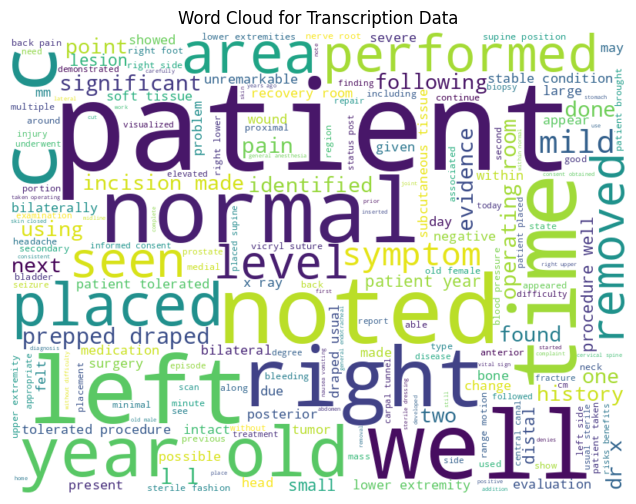

In [ ]:
# Import necessary libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Define a function to create and display a word cloud
def word_cloud(df):
    # Generate a word cloud using the combined transcription data
    wordcloud = WordCloud(width=800, height=600, background_color='white').generate(' '.join(df['transcription']))

    # Display the word cloud image using matplotlib
    plt.figure(figsize=(8, 6))  # Adjust figure size for better visualization
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title("Word Cloud for Transcription Data")
    plt.axis("off")  # Turn off axis labels
    plt.show()

# Call the word_cloud function with the DataFrame 'df'
word_cloud(df)

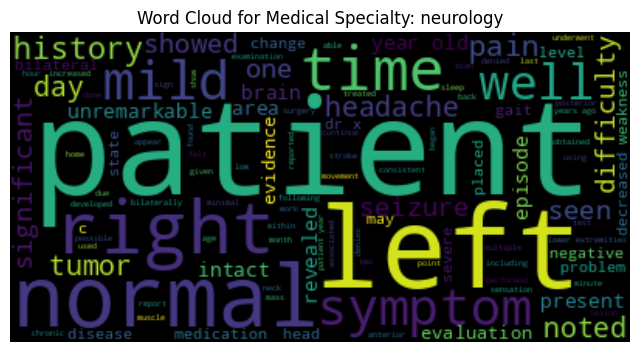

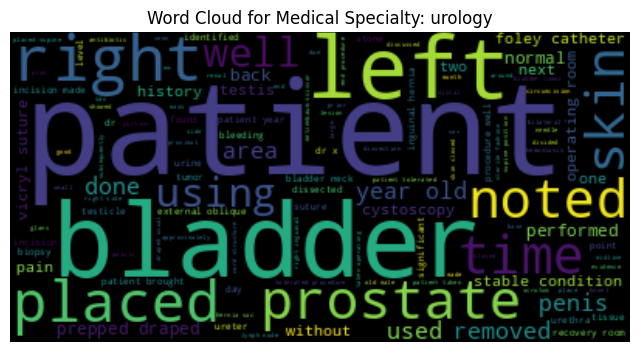

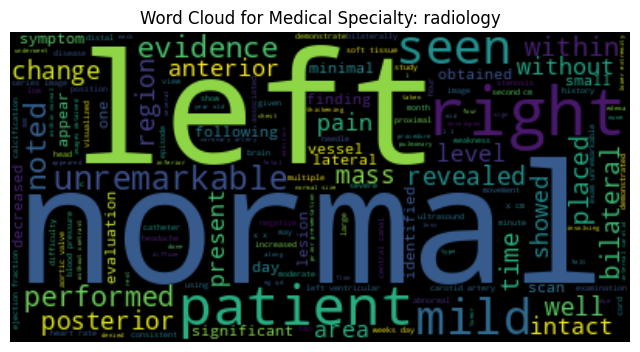

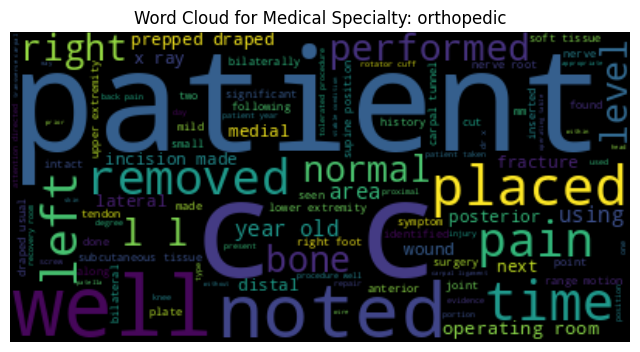

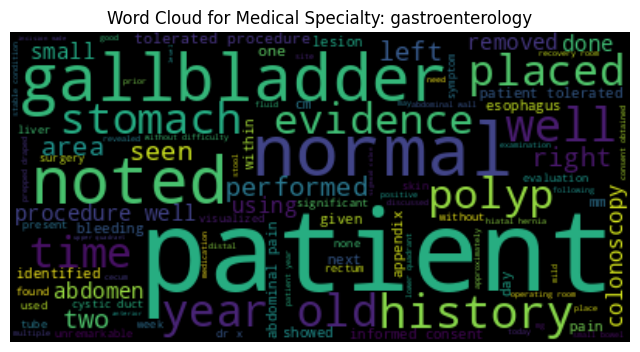

In [ ]:
# Import necessary libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# List of unique medical specialties
specialties = df['medical_specialty'].unique()

# Define a function to create and display a word cloud for a specific specialty
def word_cloud_for_specialty(df, specialty):
    # Filter data for the given specialty
    specialty_df = df[df['medical_specialty'] == specialty]

    # Generate a word cloud using transcription data of the specialty
    wordcloud = WordCloud().generate(' '.join(specialty_df['transcription']))

    # Display the word cloud image using matplotlib
    plt.figure(figsize=(8, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Word Cloud for Medical Specialty: {specialty}")
    plt.axis("off")
    plt.show()

# Generate word clouds for each unique medical specialty
for specialty in specialties:
    word_cloud_for_specialty(df, specialty)


In [ ]:
import numpy as np  # Import the NumPy library

# Calculate the maximum length of all tokenized rows in the 'tokenized_texts' list
max_length = np.max([len(row) for row in tokenized_texts])

# Print the calculated maximum length
print(max_length)

1308


In [ ]:
df['transcription']

12      confusion slurred speech (primarily obtained b...
18      elective male sterilization via bilateral vase...
20      prostate cancer hours following intravenous ad...
22      patient placed supine position prepped draped ...
23      voluntary sterility voluntary sterility bilate...
                              ...                        
3684    recurrent infected sebaceous cyst abdomen absc...
3685    nausea patient year old status post gastric by...
3686    acute appendicitis acute appendicitis laparosc...
3688    abdominal wall abscess abdominal wall abscess ...
3689    congenital chylous ascites chylothorax rule in...
Name: transcription, Length: 1230, dtype: object

In [ ]:
df['transcription'][12]

'confusion slurred speech (primarily obtained boyfriend) experienced "flu like illness weeks prior presentation weeks prior presentation found "passed out" bed awoken appeared confused lethargic apparently recovered within hours two weeks prior presentation demonstrated emotional lability uncharacteristic ( outbursts anger inappropriate laughter) left stove began slurring speech days prior admission day presentation developed right facial weakness began stumbling right denied associated headache nausea vomiting fever chills neck stiffness visual change history illicit drug use head trauma migraine headache unremarkable divorced lives boyfriend children alive well denied tobacco illicit drug use rarely consumes irregular menses c alert oriented name perseverative thought processes utilized one two word answers phrases non fluent rarely followed commands impaired writing name flattened right nasolabial fold motor mild weakness manifested pronator drift extremities full strength sensory w

In [ ]:
df['medical_specialty']

12             neurology
18               urology
20               urology
22               urology
23               urology
              ...       
3684    gastroenterology
3685    gastroenterology
3686    gastroenterology
3688    gastroenterology
3689    gastroenterology
Name: medical_specialty, Length: 1230, dtype: object

## Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Sample data for illustration
categories = ['neurology', 'urology', 'radiology', 'orthopedic', 'gastroenterology']

# Create and fit the LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(categories)

# Get the encoded values for the categories
encoded_values = label_encoder.transform(categories)

# Map the encoded values back to their original categories
decoded_categories = label_encoder.inverse_transform(encoded_values)

# Print the mapping
for encoded, decoded in zip(encoded_values, decoded_categories):
    print(f"Encoded: {encoded} --> Decoded: {decoded}")

# Simulate train-test split with encoded labels
X = df['transcription']  # Independent variable
y = df['medical_specialty']  # Target variable

# Encode the 'medical_specialty' column
encoded_labels = label_encoder.transform(y)

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, encoded_labels, test_size=0.2, random_state=42)

# Print the shape of the split datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


Encoded: 1 --> Decoded: neurology
Encoded: 4 --> Decoded: urology
Encoded: 3 --> Decoded: radiology
Encoded: 2 --> Decoded: orthopedic
Encoded: 0 --> Decoded: gastroenterology
X_train shape: (984,)
X_test shape: (246,)
y_train shape: (984,)
y_test shape: (246,)


In [ ]:
print(X_train)

2336    large herniated nucleus pulposus c c myelopath...
3521    nausea abdominal pain eating patient year old ...
3641    screening tiny polyps colonoscopy procedure in...
1755    multiple views heart great vessels reveal norm...
2227    right wrist laceration flexor carpi radialis l...
                              ...                        
3497    laparoscopic cholecystectomy informed consent ...
3548    esophageal foreign body associated comorbiditi...
3584    esophagogastroduodenoscopy biopsy abdominal pa...
2831    fall subsequent nausea vomiting initailly pres...
3579                                                     
Name: transcription, Length: 984, dtype: object


In [ ]:
print(y_train)

[2 0 0 3 2 2 3 1 2 2 3 4 1 2 0 0 2 2 3 3 2 2 3 4 4 2 2 1 2 3 2 1 1 2 4 1 4
 2 0 3 4 3 1 3 1 3 3 2 2 3 2 0 2 1 0 2 3 2 2 3 2 1 2 4 4 3 1 4 3 0 2 0 4 1
 0 0 1 1 2 1 3 2 3 2 2 4 4 2 2 0 1 2 2 1 3 1 2 2 2 4 4 2 3 4 2 2 3 2 1 0 0
 0 0 3 2 2 0 2 1 3 3 3 3 2 4 4 2 3 0 3 2 1 3 3 4 0 0 2 1 1 2 2 1 3 0 2 3 3
 4 3 2 4 3 4 1 4 2 3 4 0 2 2 4 2 0 0 2 1 1 2 2 2 2 3 2 1 3 2 1 1 1 0 0 2 4
 0 4 1 2 3 1 3 0 2 3 2 0 0 2 2 2 3 2 2 4 3 3 1 0 0 3 1 0 3 2 2 3 2 1 2 3 4
 0 0 2 4 2 1 0 4 0 2 3 3 3 0 0 3 3 3 1 4 2 0 1 2 2 2 1 1 2 4 2 2 2 0 0 3 3
 0 1 3 0 3 2 3 3 1 0 3 1 1 3 1 4 4 1 4 1 2 2 0 2 2 4 4 2 4 2 0 2 2 1 3 0 1
 1 4 2 1 4 3 2 3 3 4 0 3 4 1 3 0 4 2 1 3 1 1 2 2 0 4 2 0 2 3 0 2 2 0 4 2 1
 3 3 1 0 3 1 1 1 2 0 2 0 1 0 0 2 2 0 3 0 3 4 4 2 2 1 4 1 3 2 2 1 2 2 3 3 1
 3 0 2 1 1 3 2 4 2 2 4 0 3 2 3 3 4 4 3 0 3 0 2 0 1 2 3 0 3 4 2 3 2 1 3 2 2
 3 2 0 2 2 4 0 2 2 3 3 1 4 1 2 1 3 4 4 1 2 0 0 0 2 2 4 2 2 1 0 3 1 0 3 2 3
 1 3 2 3 2 3 4 2 1 2 4 3 0 3 1 2 3 1 1 1 2 1 2 1 2 0 2 3 2 1 0 3 3 4 0 1 2
 1 2 4 3 2 2 4 1 0 2 1 1 

In [ ]:
print(f"{X_train.shape=}")
print(f"{y_train.shape=}")
print(f"{X_test.shape=}")
print(f"{y_test.shape=}")

X_train.shape=(984,)
y_train.shape=(984,)
X_test.shape=(246,)
y_test.shape=(246,)


In [ ]:
# importing Count vectoriser
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [ ]:
# transforming X_train, X_test
X_train_bow = cv.fit_transform(X_train).toarray()
X_test_bow = cv.transform(X_test).toarray()

In [ ]:
print(f"{X_train_bow.shape=}")

print(f"{X_test_bow.shape=}")

X_train_bow.shape=(984, 12723)
X_test_bow.shape=(246, 12723)


## Building model

In [ ]:
# building model with GaussianNB
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB(force_alpha=True)

mnb.fit(X_train_bow,y_train)

MultinomialNB(force_alpha=True)

In [ ]:
#predicting from model
y_pred = mnb.predict(X_test_bow)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_test,y_pred)

0.7073170731707317

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        43
           1       0.57      0.57      0.57        46
           2       0.79      0.71      0.75        65
           3       0.54      0.59      0.57        64
           4       0.93      0.96      0.95        28

    accuracy                           0.71       246
   macro avg       0.74      0.74      0.74       246
weighted avg       0.71      0.71      0.71       246



In [ ]:
# trying improve model by utilising only 3000 features
cv = CountVectorizer(max_features=3000)

# Convert the text reviews to bag-of-words representation
X_train_bow = cv.fit_transform(X_train).toarray()
X_test_bow = cv.transform(X_test).toarray()


mnb = MultinomialNB(force_alpha=True)

mnb.fit(X_train_bow,y_train)

# Predict the labels for the test data
y_pred = mnb.predict(X_test_bow)

# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print(classification_report(y_test,y_pred))

Accuracy: 0.7479674796747967
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        43
           1       0.62      0.74      0.67        46
           2       0.88      0.69      0.78        65
           3       0.61      0.64      0.63        64
           4       0.90      0.96      0.93        28

    accuracy                           0.75       246
   macro avg       0.77      0.78      0.77       246
weighted avg       0.76      0.75      0.75       246



## Improving Model Performance with Limited Features using Multinomial Naive Bayes

In [ ]:
# Create a CountVectorizer with specified ngram range((unigrams and bigrams) and maximum features
cv = CountVectorizer(ngram_range=(1, 2), max_features=5000)

# Convert the text reviews to bag-of-words representation
X_train_bow = cv.fit_transform(X_train).toarray()
X_test_bow = cv.transform(X_test).toarray()

mnb = MultinomialNB(force_alpha=True)

mnb.fit(X_train_bow,y_train)

# Predict the labels for the test data
y_pred = mnb.predict(X_test_bow)

# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print(classification_report(y_test,y_pred))

Accuracy: 0.7479674796747967
              precision    recall  f1-score   support

           0       0.88      0.86      0.87        43
           1       0.62      0.74      0.67        46
           2       0.85      0.69      0.76        65
           3       0.62      0.64      0.63        64
           4       0.90      0.96      0.93        28

    accuracy                           0.75       246
   macro avg       0.77      0.78      0.77       246
weighted avg       0.76      0.75      0.75       246



## Enhancing Model Performance with N-grams using Multinomial Naive Bayes

In [ ]:
# Import the TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TF-IDF vectorizer
tfidf = TfidfVectorizer()

# Convert the text reviews to TF-IDF representations
X_train_tfidf = tfidf.fit_transform(X_train).toarray()
X_test_tfidf = tfidf.transform(X_test)


mnb = MultinomialNB(force_alpha=True)

mnb.fit(X_train_bow,y_train)

# Predict the labels for the test data
y_pred = mnb.predict(X_test_bow)

# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print(classification_report(y_test,y_pred))

Accuracy: 0.7479674796747967
              precision    recall  f1-score   support

           0       0.88      0.86      0.87        43
           1       0.62      0.74      0.67        46
           2       0.85      0.69      0.76        65
           3       0.62      0.64      0.63        64
           4       0.90      0.96      0.93        28

    accuracy                           0.75       246
   macro avg       0.77      0.78      0.77       246
weighted avg       0.76      0.75      0.75       246



## How to Enhance Model Performance

- **Semantic Word Removal:** Analyzing the generated word clouds for each medical specialty reveals recurring words that might not contribute unique information. By strategically removing these redundant terms, the feature space for each specialty can be enriched, enabling the algorithm to make finer distinctions and improve classification accuracy.

- **Data Augmentation:** Augmenting the dataset by adding more diverse examples for each medical specialty can substantially enhance model performance. Collecting additional medical transcriptions and carefully curating them for training can help the model better capture the nuances and variations within each specialty, leading to more accurate predictions.

**Conclusion:**

The code provides a comprehensive framework for classifying medical transcriptions into specific medical specialties. By leveraging text preprocessing, feature extraction, and machine learning models, valuable insights can be extracted from clinical data. The process demonstrates the importance of data preparation, model selection, and performance evaluation in achieving accurate and meaningful results for healthcare-related text classification tasks.

## Thank you for reading till the end

##- Raviteja
https://www.linkedin.com/in/raviteja-padala/